In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('IRIS.csv')
print(df.head())
print(df.describe())
print(df.info())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
<class 'pandas.core.frame.DataFrame'>
RangeInd

In [3]:
print(df['species'].value_counts())
print(df.isnull().sum())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


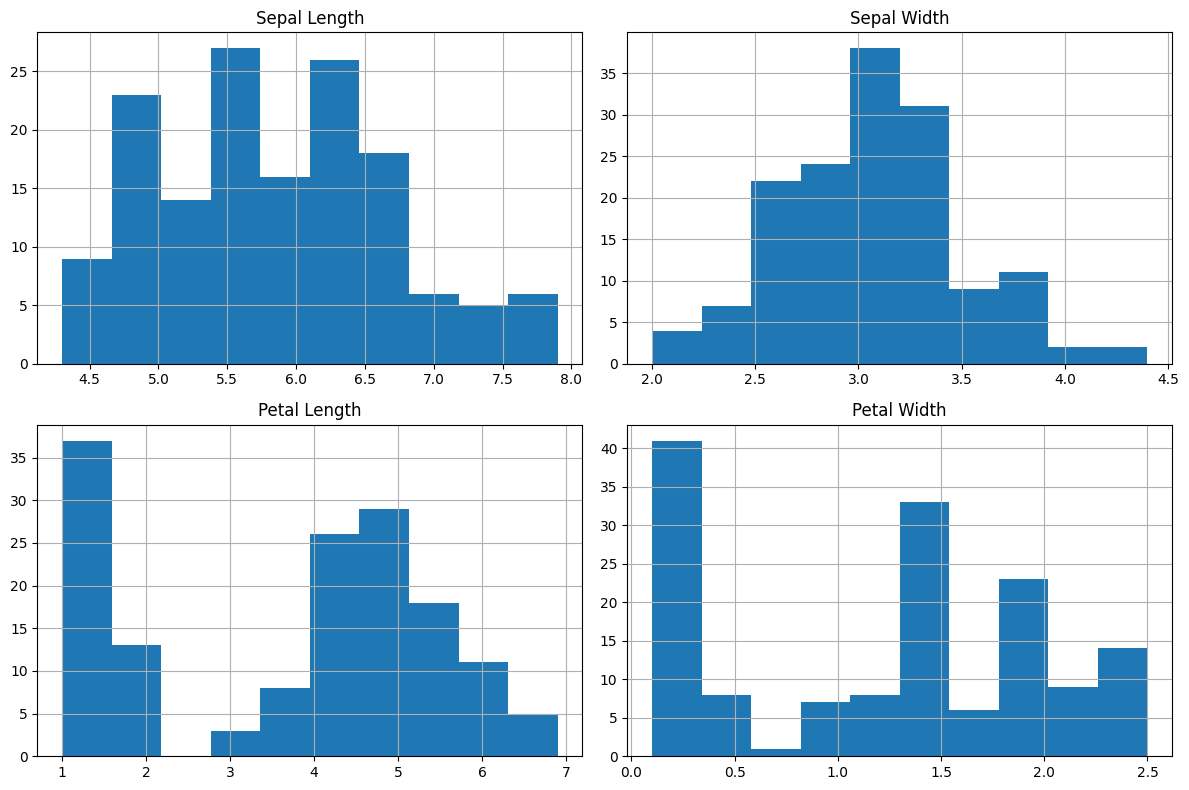

In [4]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
df['sepal_length'].hist()
plt.title('Sepal Length')

plt.subplot(2, 2, 2)
df['sepal_width'].hist()
plt.title('Sepal Width')

plt.subplot(2, 2, 3)
df['petal_length'].hist()
plt.title('Petal Length')

plt.subplot(2, 2, 4)
df['petal_width'].hist()
plt.title('Petal Width')

plt.tight_layout()
plt.show()

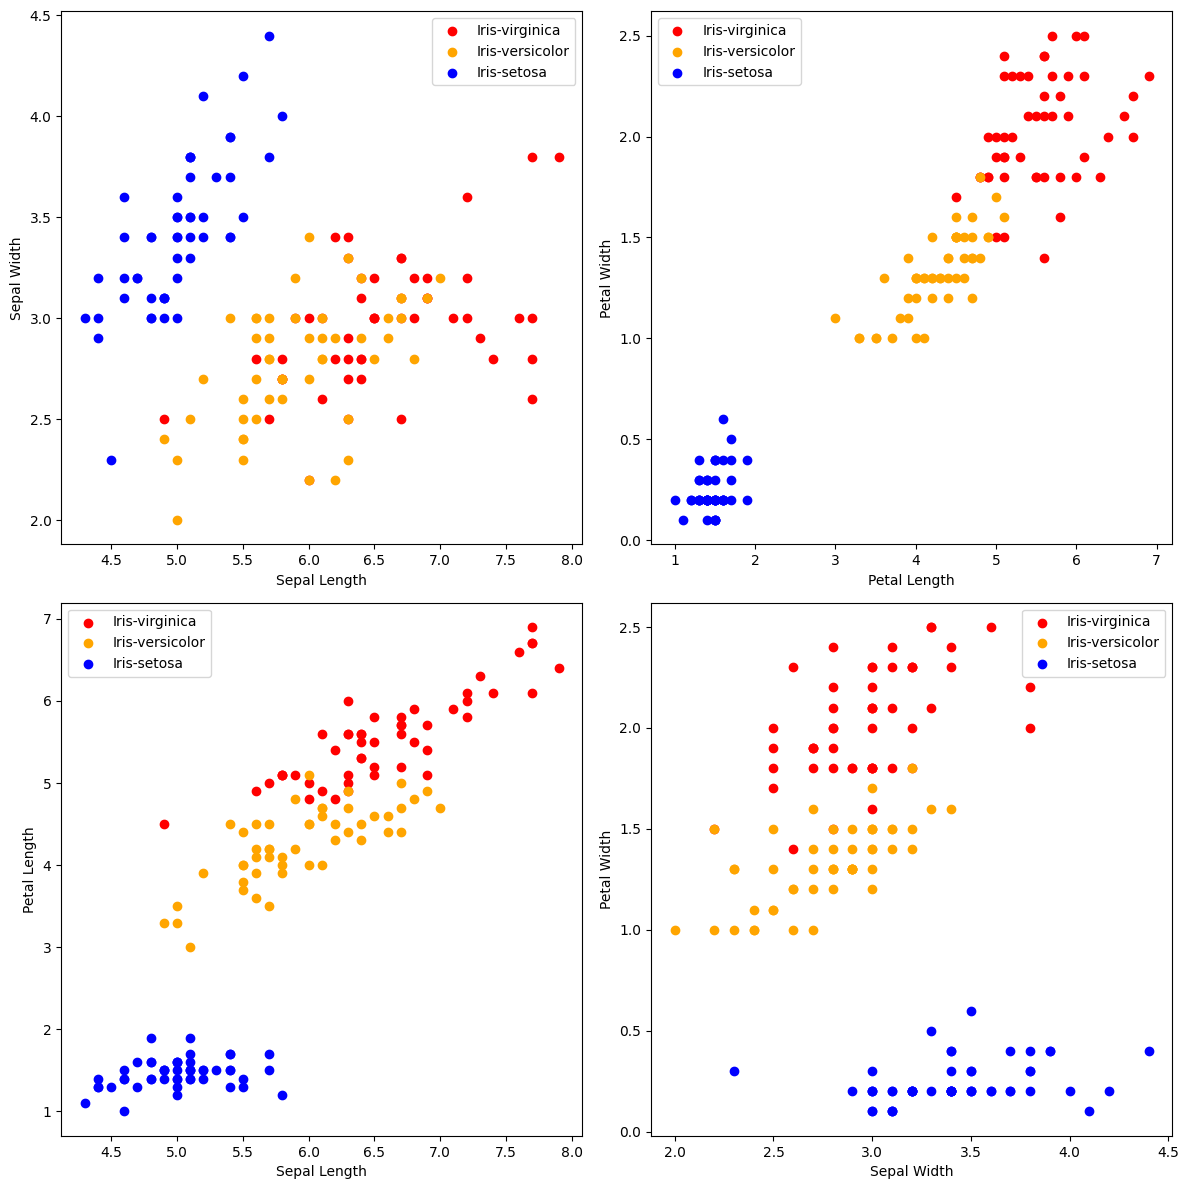

In [6]:
colors= ['red','orange','blue']
species= ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

plt.figure(figsize=(12, 12))

for i in range(3):
    x = df[df['species'] == species[i]]
    plt.subplot(2, 2, 1)
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.scatter(x['sepal_length'], x['petal_length'], c=colors[i], label=species[i])
    plt.xlabel('Sepal Length')
    plt.ylabel('Petal Length')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.scatter(x['sepal_width'], x['petal_width'], c=colors[i], label=species[i])
    plt.xlabel('Sepal Width')
    plt.ylabel('Petal Width')
    plt.legend()

plt.tight_layout()
plt.show()

<Axes: >

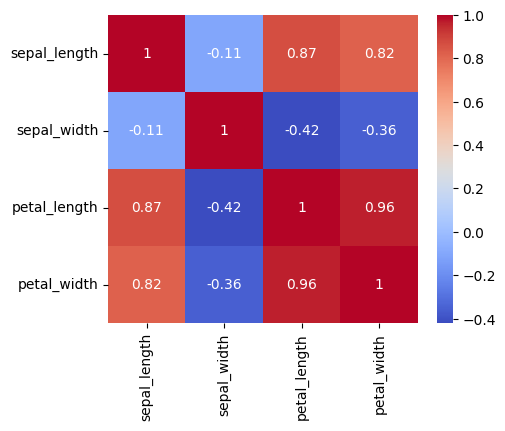

In [7]:
corr = df.drop(columns=['species']).corr()
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot = True, ax= ax, cmap = 'coolwarm')

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [9]:
from sklearn.model_selection import train_test_split
X= df.drop(columns=['species'])
Y = df['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train)
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


In [11]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [12]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333
